In [107]:
from k_means_constrained import KMeansConstrained
import matplotlib.pyplot as plt
import numpy as np
import random

def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [108]:
def create_dp(points):
    x = [i for i,j in points]
    y = [j for i,j in points]

    dp = [np.mean(x), np.mean(y)]

    return dp

In [109]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

In [110]:
def clusters_plot(clusters, centroids, dp=False):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("After Clustering")
    plt.show()

In [111]:
def dp_plot(clusters, centroids, dp, title=False):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        for i in range(len(points)-1):
            plt.plot([points[i][0],points[i+1][0]],[points[i][1], points[i+1][1]], c='gray')
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    if dp:
        plt.scatter(dp[0], dp[1], marker='X', c='red', s=200)
    
    if title:
        plt.title(title)
    else:
        plt.title("After Clustering")
    # plt.show()

In [112]:
def calculate_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2)**2))

In [113]:
def total_dist(pts):
    sum = 0
    for i in range(len(pts)-1):
        sum += calculate_distance(pts[i], pts[i+1])

    return sum

In [114]:
from itertools import permutations

def tsp(cluster):
    paths = list(permutations(cluster))
    distance = []
    for path in paths:
        path = list(path)
        dist = 0
        for i in range(len(path)-1):
            dist += calculate_distance(path[i], path[i+1])
        distance.append(dist)
    
    ans_route = paths[np.argmin(distance)]
    ans_distance = distance[np.argmin(distance)]

    return [ans_route[0], ans_route[-1]],ans_route

In [115]:
def tsp_brut(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].append(dp)
        path[i].insert(0, dp)

        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(path[i])-1):
            sum += calculate_distance(path[i][j], path[i][j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

## Main

In [116]:
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_locations(x, y, n)

centroids, clusters = KMeans(delivery_loc, n, k)

clusters

{0: [[22.584, 88.4609],
  [22.5805, 88.4654],
  [22.5858, 88.4648],
  [22.5857, 88.4574],
  [22.5855, 88.4586]],
 1: [[22.5814, 88.4046],
  [22.5934, 88.4101],
  [22.5913, 88.4063],
  [22.5823, 88.4076],
  [22.597, 88.4037]],
 2: [[22.5962, 88.4323],
  [22.5874, 88.4274],
  [22.5941, 88.4236],
  [22.5897, 88.435],
  [22.5855, 88.4371]],
 3: [[22.6137, 88.4147],
  [22.6139, 88.4182],
  [22.6014, 88.4126],
  [22.6082, 88.4118],
  [22.6018, 88.4262]],
 4: [[22.5795, 88.4234],
  [22.5811, 88.4189],
  [22.5822, 88.4235],
  [22.5742, 88.4142],
  [22.5734, 88.4184]],
 5: [[22.5966, 88.454],
  [22.5954, 88.4566],
  [22.5917, 88.4592],
  [22.598, 88.4603],
  [22.5942, 88.4631]],
 6: [[22.5768, 88.4271],
  [22.5798, 88.4342],
  [22.5835, 88.4323],
  [22.5783, 88.4307],
  [22.5745, 88.4409]],
 7: [[22.6097, 88.4531],
  [22.611, 88.445],
  [22.6101, 88.4603],
  [22.6016, 88.4567],
  [22.6134, 88.4545]],
 8: [[22.5924, 88.4118],
  [22.5971, 88.4127],
  [22.5917, 88.4191],
  [22.5943, 88.411],
  [22

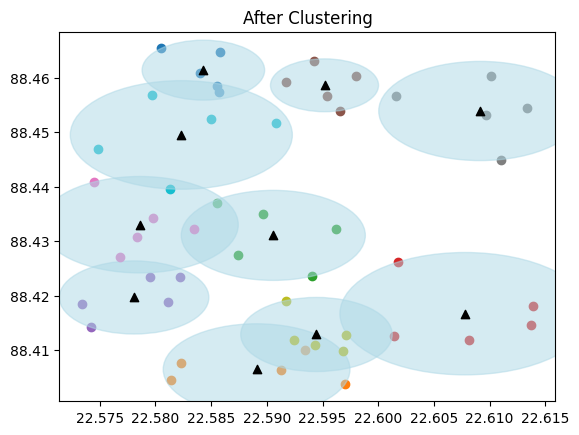

In [117]:
clusters_plot(clusters, centroids)

## <font color="green">Attempt 1</font>

In [118]:
longest_points = []
clusters_2 = clusters.copy()

for cls_id, cluster in clusters.items():
    points, new_cluster = tsp(cluster)
    clusters[cls_id] = new_cluster
    longest_points.append(points[0])
    longest_points.append(points[1])

print(clusters)
print(longest_points)

{0: ([22.5805, 88.4654], [22.5858, 88.4648], [22.584, 88.4609], [22.5855, 88.4586], [22.5857, 88.4574]), 1: ([22.5814, 88.4046], [22.5823, 88.4076], [22.5913, 88.4063], [22.5934, 88.4101], [22.597, 88.4037]), 2: ([22.5874, 88.4274], [22.5941, 88.4236], [22.5962, 88.4323], [22.5897, 88.435], [22.5855, 88.4371]), 3: ([22.6139, 88.4182], [22.6137, 88.4147], [22.6082, 88.4118], [22.6014, 88.4126], [22.6018, 88.4262]), 4: ([22.5795, 88.4234], [22.5822, 88.4235], [22.5811, 88.4189], [22.5734, 88.4184], [22.5742, 88.4142]), 5: ([22.5966, 88.454], [22.5954, 88.4566], [22.5917, 88.4592], [22.5942, 88.4631], [22.598, 88.4603]), 6: ([22.5768, 88.4271], [22.5783, 88.4307], [22.5835, 88.4323], [22.5798, 88.4342], [22.5745, 88.4409]), 7: ([22.611, 88.445], [22.6097, 88.4531], [22.6134, 88.4545], [22.6101, 88.4603], [22.6016, 88.4567]), 8: ([22.5971, 88.4127], [22.5968, 88.4098], [22.5943, 88.411], [22.5924, 88.4118], [22.5917, 88.4191]), 9: ([22.5908, 88.4518], [22.585, 88.4525], [22.5797, 88.4568],

In [119]:
dp = create_dp(longest_points)
print(dp)

[22.590314999999997, 88.43424]


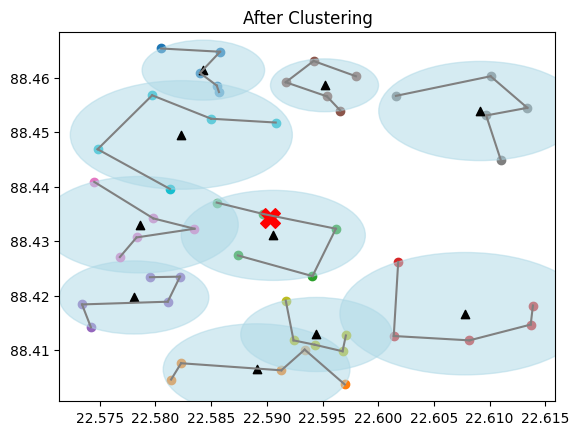

In [120]:
dp_plot(clusters, centroids, dp)

In [121]:
# final path

for cls_id, cluster_path in clusters.items():
    path = list(cluster_path)
    path.append(dp)
    path.insert(0, dp)
    clusters[cls_id] = path

print(clusters)

{0: [[22.590314999999997, 88.43424], [22.5805, 88.4654], [22.5858, 88.4648], [22.584, 88.4609], [22.5855, 88.4586], [22.5857, 88.4574], [22.590314999999997, 88.43424]], 1: [[22.590314999999997, 88.43424], [22.5814, 88.4046], [22.5823, 88.4076], [22.5913, 88.4063], [22.5934, 88.4101], [22.597, 88.4037], [22.590314999999997, 88.43424]], 2: [[22.590314999999997, 88.43424], [22.5874, 88.4274], [22.5941, 88.4236], [22.5962, 88.4323], [22.5897, 88.435], [22.5855, 88.4371], [22.590314999999997, 88.43424]], 3: [[22.590314999999997, 88.43424], [22.6139, 88.4182], [22.6137, 88.4147], [22.6082, 88.4118], [22.6014, 88.4126], [22.6018, 88.4262], [22.590314999999997, 88.43424]], 4: [[22.590314999999997, 88.43424], [22.5795, 88.4234], [22.5822, 88.4235], [22.5811, 88.4189], [22.5734, 88.4184], [22.5742, 88.4142], [22.590314999999997, 88.43424]], 5: [[22.590314999999997, 88.43424], [22.5966, 88.454], [22.5954, 88.4566], [22.5917, 88.4592], [22.5942, 88.4631], [22.598, 88.4603], [22.590314999999997, 88

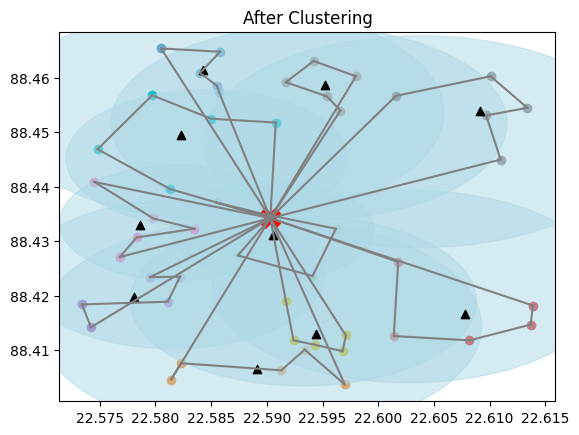

In [122]:
dp_plot(clusters, centroids, dp)

In [123]:
total_distance = 0

for cls_id, cluster_path in clusters.items():
    distance = total_dist(cluster_path)
    total_distance += distance

print("Total distance :", total_distance)

Total distance : 0.640652670883801


## <font color="green">Attempt 2</font>

In [124]:
dp_2 = create_dp(centroids)

print(dp_2)

[22.590954, 88.43433399999999]


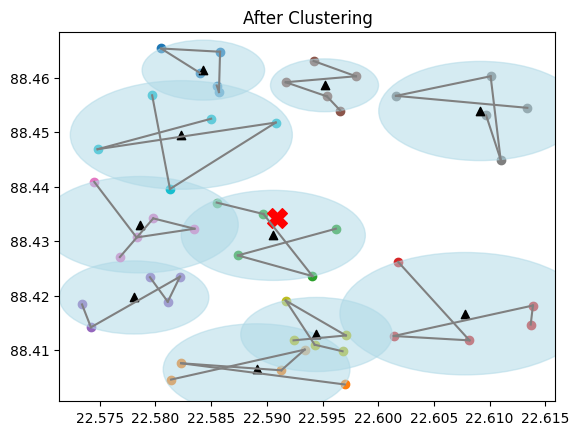

In [125]:
dp_plot(clusters_2, centroids, dp_2)

In [126]:
for i in clusters_2:
    clusters_2[i] = tsp_brut(clusters_2[i], dp_2)

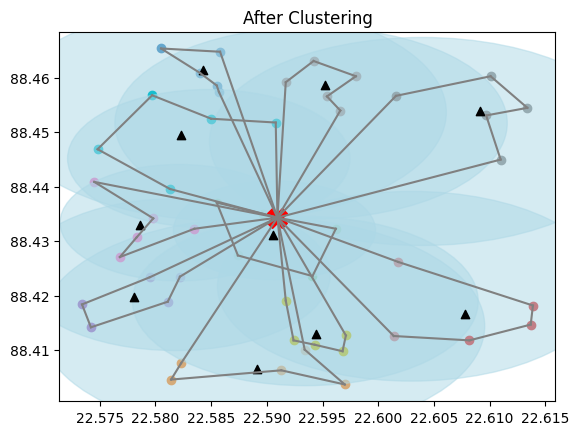

In [127]:
dp_plot(clusters_2, centroids, dp_2)

In [128]:
total_distance_2 = 0

for cls_id, cluster_path in clusters_2.items():
    distance = total_dist(cluster_path)
    total_distance_2 += distance

print("Total distance :", total_distance_2)

Total distance : 0.6133940402403003


## <font color="yellow">Comparison</font>

Total distance from attempt 1 : 0.640652670883801
Total distance from attempt 2 : 0.6133940402403003
----------------------------------------------------------------------------------------------------


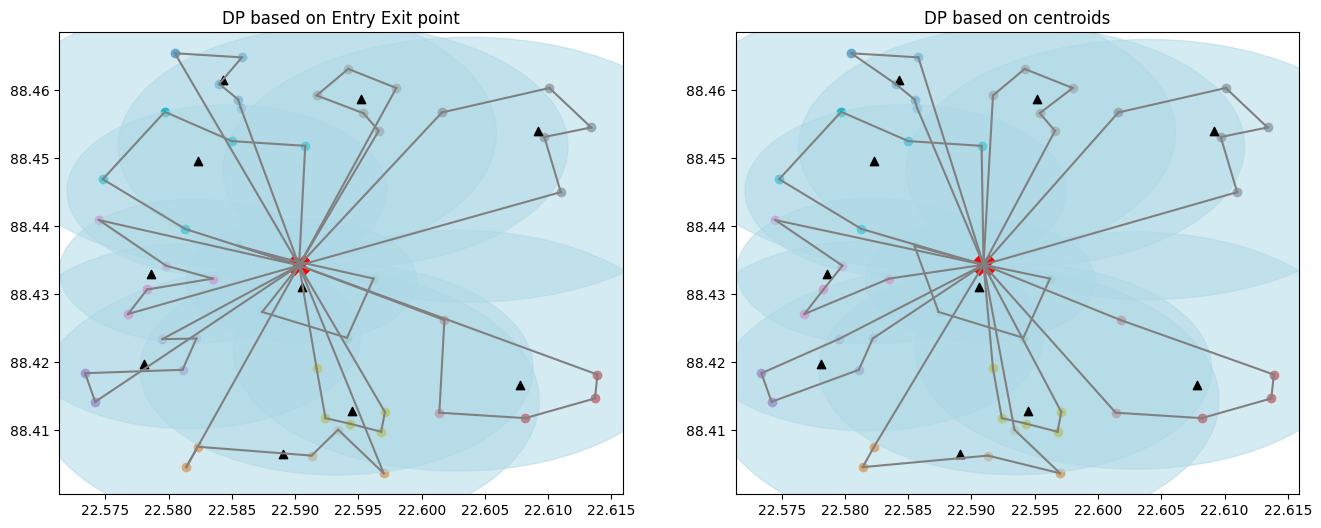

In [129]:
print("Total distance from attempt 1 :",total_distance)
print("Total distance from attempt 2 :",total_distance_2)
print("-"*100)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
dp_plot(clusters, centroids, dp, "DP based on Entry Exit point")
plt.subplot(1,2,2)
dp_plot(clusters_2, centroids, dp_2, "DP based on centroids")